# SVD
----
Checking if the product of the calculated matrixes for the SVD actually is the matrix A

In [60]:
import numpy as np

A = np.array([[1.,2.,0.],[2.,1.,0.],[0.,0.,1.]])
U = np.array([[1/(np.sqrt(2)), 0, -1/np.sqrt(2)], [1/np.sqrt(2), 0, 1/np.sqrt(2)], [0, 1, 0]])
V = np.array([[1/np.sqrt(2), 0, 1/np.sqrt(2)], [1/np.sqrt(2), 0, -1/np.sqrt(2)], [0,1,0]])
Σ = np.array([[3,0,0], [0,1,0],[0,0,1]])

print(A - U@Σ@np.transpose(V))

[[1.11022302e-16 2.22044605e-16 0.00000000e+00]
 [2.22044605e-16 1.11022302e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


We can see that the difference of these matrices are basicly the zero matrix, so the given input matrices are the SVD. You could also check that U and V are orthogonal, but this can be observed.

# Romberg
----
An algorithm to calculate the Romberg Matrix w/ example

In [61]:
from numpy import exp
from copy import deepcopy

def equiX(start, end, m):
    """
    Calculating equinodes
    ---Parameters---
    start :: Double <- Start value
    end :: Double <- End value
    m :: Int <- Amounts of steps
    ---Returns--
    :: [Double] <- Returns a list of doubles, which are the equidistant points
    """
    stepSize = (end-start)/m
    return [start+i*stepSize for i in range(m+1)]


def compTrap(f, start, end, m):
    """
    Function for computing integral with trapezoid rule
    ---Parameters---
    f :: Function <- The function to integrate
    start :: Double <- Start value
    end :: Double <- End value
    m :: Int <- Amount of steps to use
    ---Returns---
    :: Double <- The evaluation of the integral
    """
    h = (end-start)/m
    xs = equiX(start, end, m)
    midPoints = sum([f(xs[i]) for i in range(1, m)])
    return h*(f(xs[0])/2+midPoints+f(xs[-1])/2)

def romberg(f, start, end, maximum):
    """
    Implementation of the romberg algorithm
    ---Parameters---
    f :: Function <- The function to integrate
    start :: Double <- Start value
    end :: Double <- End value
    maximum :: Int <- Maximum amount of steps to use 
    ---Returns---
    """
    zeros = [0 for i in range(maximum)]
    initial = [compTrap(f, start, end, 2**m) for m in range(1,maximum+1)]
    algoMatrix = [initial if i == 0 else deepcopy(zeros) for i in range(maximum)]
    for k in range(1, maximum):
        for i in range(k, maximum):
            algoMatrix[k][i] = ((4**k)*algoMatrix[k-1][i]-algoMatrix[k-1][i-1])/((4**k)-1)
    return algoMatrix


def f(x):
    return exp(-1*(x**2))
print(romberg(f, 0, 1, 4)[2][3])

0.7468241332296145


By checking with wolfram-alpha we see that this value is pretty close to the value of the integral.

# Lotka-Volterra
----
Implementation of Euler's method and Heun's method.

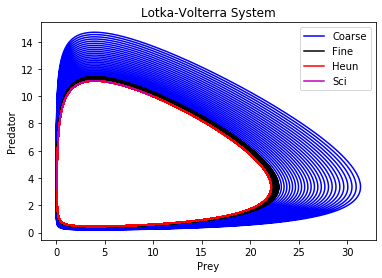

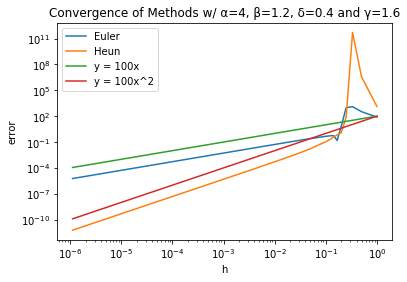

In [104]:
import matplotlib.pyplot as plt
import scipy.integrate as ode
from numpy import sqrt

def equiX(start, end, m):
    """
    Calculating equinodes
    ---Parameters---
    start :: Double <- Start value
    end :: Double <- End value
    m :: Int <- Amounts of steps
    ---Returns--
    :: [Double] <- Returns a list of doubles, which are the equidistant points
    """
    stepSize = (end-start)/m
    return [start+i*stepSize for i in range(m+1)]

# y' = F(x, y), hvor y : R -> R, F : RxR^n -> R^n
def euler(F, start, end, steps, y0):
    """
    Implementation of Euler's method for ivps
    ---Parameters---
    F :: Function <- The ivp represented as a linear transformation
    start :: Double <- Start value
    end :: Double <- End value
    steps :: Int <- Amounts of steps
    y0 :: [Double] <- Initial values
    ---Returns---
    :: [[Double]] <- Returns a list of the numerical solutions to the ivps
    """
    h = (end-start)/steps
    xs = equiX(start, end, steps)
    ys = [y0]
    for x in xs[1:]:
        temp = []
        yn = ys[-1]
        f = F(x, yn)
        for i in range(len(yn)):
            temp.append(yn[i] + h*f[i])
        ys.append(temp)
    return ys

# y' = F(x, y), hvor y : R -> R, F : RxR^n -> R^n
def heun(F, start, end, steps, y0):
    """
    Implementation of Heun's method
    ---Parameters---
    F :: Function <- The ivp represented as a linear transformation
    start :: Double <- Start value
    end :: Double <- End value
    steps :: Int <- Amounts of steps
    y0 :: [Double] <- Initial values 
    ---Returns---
    :: [[Double]] <- Returns a list of the numerical solutions to the ivps
    """
    h = (end-start)/steps
    xs = equiX(start, end, steps)
    ys = [y0]
    for x in xs[1:]:
        temp = []
        eul = []
        yn = ys[-1]
        f = F(x, yn)
        for i in range(len(yn)):
            eul.append(yn[i] + h*f[i])
        for i in range(len(yn)):
            g = F(x+h, eul)
            temp.append(yn[i] + h/2*(f[i] + g[i]))
        ys.append(temp)
    return ys

def split(xs):
    """
    A multi unzip function
    ---Parameters---
    xs :: [(a,b,..)] <- A polymorphic list of k-Cartesian product
    ---Returns---
    :: [[a],[b],...] <- A polymorphic list of lists
    """
    testos = len(xs[0])
    containers = [[] for i in range(testos)]
    for tup in xs:
        for i in range(testos):
            containers[i].append(tup[i])
    return containers

ls = equiX(0,1,100)
α, β, δ, γ = 4, 1.2, .4, 1.6
F = lambda x, ys: [α*ys[0]-β*ys[0]*ys[1], δ*ys[0]*ys[1]-γ*ys[1]]
init = [10, 10]
# eTest1 = euler(F, 0, 100, 10000, init)
eTest2 = euler(F, 0, 100, 100000, init)
eTest3 = euler(F, 0, 100, 1000000, init)
hTest = heun(F, 0, 100, 10000, init)
bestTest = list(map(ode.solve_ivp(F, [0, 100], init, dense_output = True).sol, ls))

#Euler error
def EulerError(sys, ini, start, end, iterable, solution):
    """
    Function for finding a list of errors for Euler's method, repeatedly along an iterator
    ---Parameters---
    sys :: Function <- A linear transformation of the bvp
    ini :: [Double] <- Initial values for ivp
    start :: Double <- Start value
    end :: Double <- End value
    iterable :: [Int] <- List of amounts of steps to use
    solution :: Function <- Best solution available
    ---Returns---
    :: [Double] <- A list of the error along iterable
    """
    errls = []
    for i in iterable:
        ls = equiX(start, end, i)
        test = split(euler(sys, start, end, i, ini))
        comp = solution(end)
        err = 0
        for j in range(len(test)):
            err += abs(test[j][-1]-comp[j])**2
            #err += err2([t[j] for t in test], [c[j] for c in comp], start, end, i+1)**2
        errls.append(sqrt(err))
    return errls

#Heun Error
def HeunError(sys, ini, start, end, iterable, solution):
     """
    Function for finding a list of errors for Heun's method, repeatedly along an iterator
    ---Parameters---
    sys :: Function <- A linear transformation of the bvp
    ini :: [Double] <- Initial values for ivp
    start :: Double <- Start value
    end :: Double <- End value
    iterable :: [Int] <- List of amounts of steps to use
    solution :: Function <- Best solution available
    ---Returns---
    :: [Double] <- A list of the error along iterable
    """
    errls = []
    for i in iterable:
        test = split(heun(sys, start, end, i, ini))
        comp = solution(end)
        err = 0
        for j in range(len(test)):
            err += abs(test[j][-1]-comp[j])**2
            #err += err2([t[j] for t in test], [c[j] for c in comp], start, end, i+1)**2
        errls.append(sqrt(err))
    return errls

plt.figure()
plt.axes(xlabel = "Prey", ylabel = "Predator")
plt.title("Lotka-Volterra System")
# plt.plot([v[0] for v in eTest1], [v[1] for v  in eTest1], 'c')
plt.plot([v[0] for v in eTest2], [v[1] for v  in eTest2], 'b', label = "Coarse")
plt.plot([v[0] for v in eTest3], [v[1] for v  in eTest3], 'k', label = "Fine")
plt.plot([v[0] for v in hTest], [v[1] for v in hTest], 'r', label = "Heun")
plt.plot([v[0] for v in bestTest], [v[1] for v in bestTest], 'm', label = "Sci")
plt.legend()
plt.show()

x1 = lambda x: 100*x
x2 = lambda x: 100*x**2

plotover = [i for i in range(1,10)] + [i*10 for i in range(1,10)] + [i*100 for i in range(1,10)] + [i*1000 for i in range(1,10)] + [i*10000 for i in range(1,10)] + [i*100000 for i in range(1,10)]
superIntendent = ode.solve_ivp(F, [0, 1], init, method = "DOP853", dense_output = True, max_step = 10e-6).sol
errsEul = EulerError(F, init, 0, 1, plotover, superIntendent)
errsHeun = HeunError(F, init, 0, 1, plotover, superIntendent)
plotls = [1/(i*1) for i in plotover]
errsEul.reverse()
errsHeun.reverse()
plotls.reverse()
plt.figure()
plt.axes(xlabel = "h", ylabel = "error")
plt.title(f"Convergence of Methods w/ α={α}, β={β}, δ={δ} and γ={γ}")
plt.loglog(plotls, errsEul, label = "Euler")
plt.loglog(plotls, errsHeun, label = "Heun")
plt.loglog(plotls, list(map(x1, plotls)), label = "y = 100x")
plt.loglog(plotls, list(map(x2, plotls)), label = "y = 100x^2")
plt.legend()
plt.show()

In the given plot, we can see what we want. Euler's method is parallell to the green line, which shows that it has linear complexity. While Heun's method is a lot less stabile for very big step-sizes, but it gets down to quadratic complexity as the step-size grows.

# Linearized Pendulum Eq
----
Implementation of a method for solving bvps numericall. In order to calculate the error of this method we need a reference solution. Since the diff.eq. is equal to zero, we are only interested in finding the kernel of the linear operator given by the differential equation. It is a well known fact that the kernel is generated by $e^{-i\omega t}$ and $e^{i\omega t}$ for this diff.eq. In our case we get that the solution $y=C_1e^{-i\omega t} + C_2e^{i\omega t}=(C_1+C_2)\cos(\omega t)+(C_1-C_2)\sin(\omega t)$. $C_1+C_2$ and $C_1-C_2$ are linearly independent, so we can rewrite the following equation into: $y = c_1\cos(\omega t)+c_2\sin(\omega t)$.

We want to solve the diff.eq. $y''(\theta)+\omega^2y(\theta)=0$ with boundary values $y(0) = 0$ and $y(1) = 1$. Using the solution above we get that: $y(0) = 0 = c_1$ and $y(1) = 1 = c_1 \implies y = \sin(\frac{\pi}{2}t)$. And this is the reference solution which will be used.

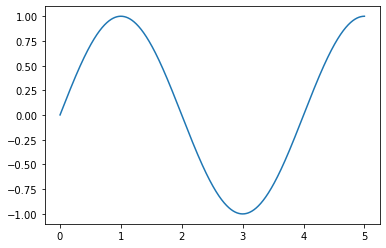

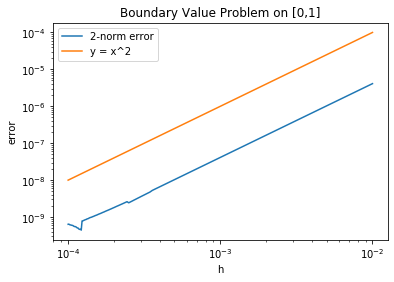

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def equiX(start, end, m):
    """
    Calculating equinodes
    ---Parameters---
    start :: Double <- Start value
    end :: Double <- End value
    m :: Int <- Amounts of steps
    ---Returns--
    :: [Double] <- Returns a list of doubles, which are the equidistant points
    """
    stepSize = (end-start)/m
    return np.array([start+i*stepSize for i in range(m+1)])

def Ah(dim):
    """
    Construction of A_h matrix with dimXdim dims
    ---Parameters---
    dim :: Int <- Dimensions of matrix
    ---Returns---
    :: np.array <- The A_h matrix
    """
    one = np.array([1 for i in range(dim-1)])
    two = np.array([-2 for i in range(dim)])
    return np.diag(two) + np.diag(one, -1) + np.diag(one, 1)


def bvp(ω, F, start, end, α, β, M):
    """
    Specific boundary value problem solver
    ---Parameters---
    ω :: Double <- A parameter
    F :: Function <- A collection of the right hand sides, when evaluated
    start :: Double <- Start value
    end :: Double <- End value
    α :: Double <- Boundary value at start
    β :: Double <- Boundary value at end
    M :: Int <- Number of steps -2
    ---Returns---
    :: [Double] <- A numerical solution of the boundary value problem
    """
    h = (end-start)/(M+1)
    def choice(i):
        if i == 1:
            return -α/(h**2)
        elif i == M:
            return -β/(h**2)
        else:
            return 0

    xs = equiX(start, end, M+1)
    Gh = (1/h**2)*Ah(M) + ω**2*np.identity(M)
    b = np.array([F[i-1](xs[i]) + choice(i) for i in range(1,M+1)])
    return np.linalg.solve(Gh, b)

plt.figure()
plt.plot([5*i/5000 for i in range(1, 5001)], bvp(np.pi/2,[lambda x: 0 for i in range(5000)], 0, 5, 0, 1, 5000))
plt.show()

def actSol(x):
    'The actual solution of this very specific bvp'
    return np.sin(np.pi*x/2)
    
def err2(xs, ys, start, end, steps):
    """
    Function for approximating the 2-norm between two functions
    ---Parameters---
    xs :: [Double] <- Discretization points of first function
    ys :: [Double] <- Discretization points of second function
    start :: Double <- Start value
    end :: Double <- End value
    steps :: Int <- Amount of steps to take
    ---Returns---
    :: Double <- The 2-norm between the functions
    """
    return sqrt((end-start)/steps*sum([(y-x)**2 for (x,y) in zip(xs, ys)]))
    
def errThisTask(h):
    """
    A way for calculating the error for this specific bvp
    ---Parameters---
    h :: Double <- The step-size to use
    ---Returns---
    :: Double <- The error of the bvp
    """
    M = round(1/h) - 1
    ls = [i*h for i in range(1,M+1)]
    numSol = bvp(np.pi/2,[lambda x: 0 for i in range(M)], 0, 1, 0, 1, M)
    Sol = list(map(actSol, ls))
    return err2(numSol, Sol, 0, 1, M+2)

x2 = lambda x: x**2
    
plotls = [1/(i*100) for i in range(1, 101)]
ys = list(map(errThisTask, plotls))
plt.figure()
plt.axes(xlabel = "h", ylabel = "error")
plt.title("Boundary Value Problem on [0,1]")
plt.loglog(plotls, ys, label = "2-norm error")
plt.loglog(plotls, x2(np.array(plotls)), label = "y = x^2")
plt.legend()
plt.show()

By observation we see that the first plot looks a lot like a sinus curve, which is always a good sign. The error presented below is clearly bounded by $\mathcal{O}(h^2)$, which is what I wanted to show. Something weird happens at the end there, but I choose to ignore it, as it seems quite innocent looking.